In [28]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
print(df.head()) 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(df.isnull().sum())  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [6]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df['Sex']=df['Sex'].map({'female':0,'male':1})

In [8]:
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [9]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [12]:
scaler_1=StandardScaler()
df1=df.copy()
df1[['Age','Fare']]=scaler_1.fit_transform(df[['Age','Fare']])
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1 -0.565736      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                               Heikkinen, Miss. Laina    0 -0.258337      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                             Allen, Mr. William Henry    1  0.433312      0   
..                                                 ...  ...    

In [13]:
scaler_2=MinMaxScaler()
df2=df.copy()
df2[['Age','Fare']]=scaler_2.fit_transform(df2[['Age','Fare']])

print(df2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  0.271174      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229      1   
2                               Heikkinen, Miss. Laina    0  0.321438      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531      1   
4                             Allen, Mr. William Henry    1  0.434531      0   
..                                                 ...  ...    

In [14]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3            113803  53.1000  C123       False      

In [17]:
# Summary statistics for numeric features
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

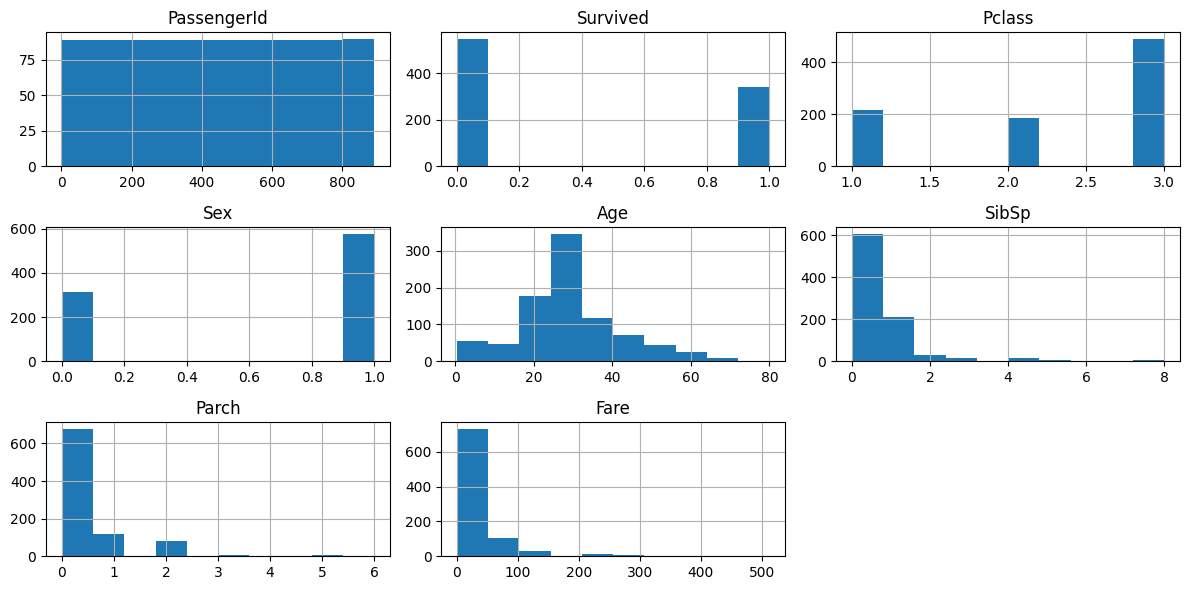

In [24]:
df.hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

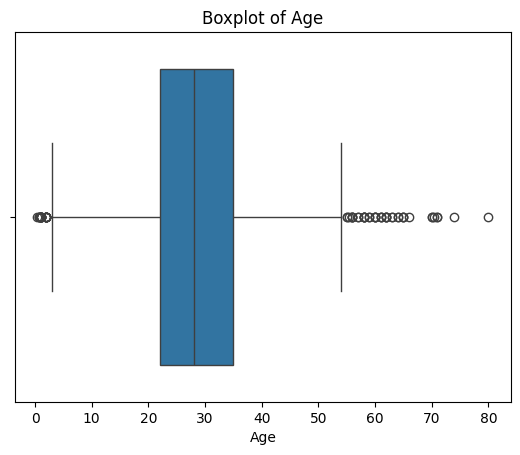

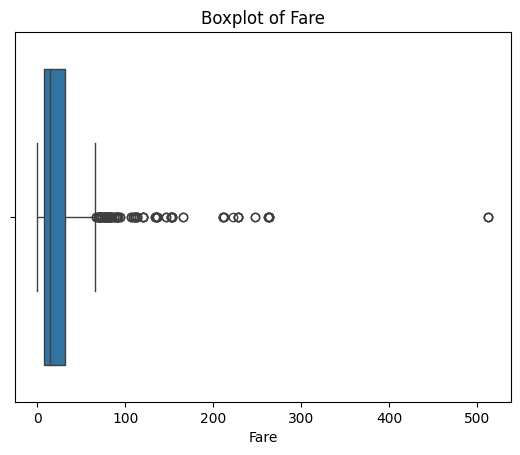

In [25]:
numeric_cols = ['Age', 'Fare']  # Add more columns if needed

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

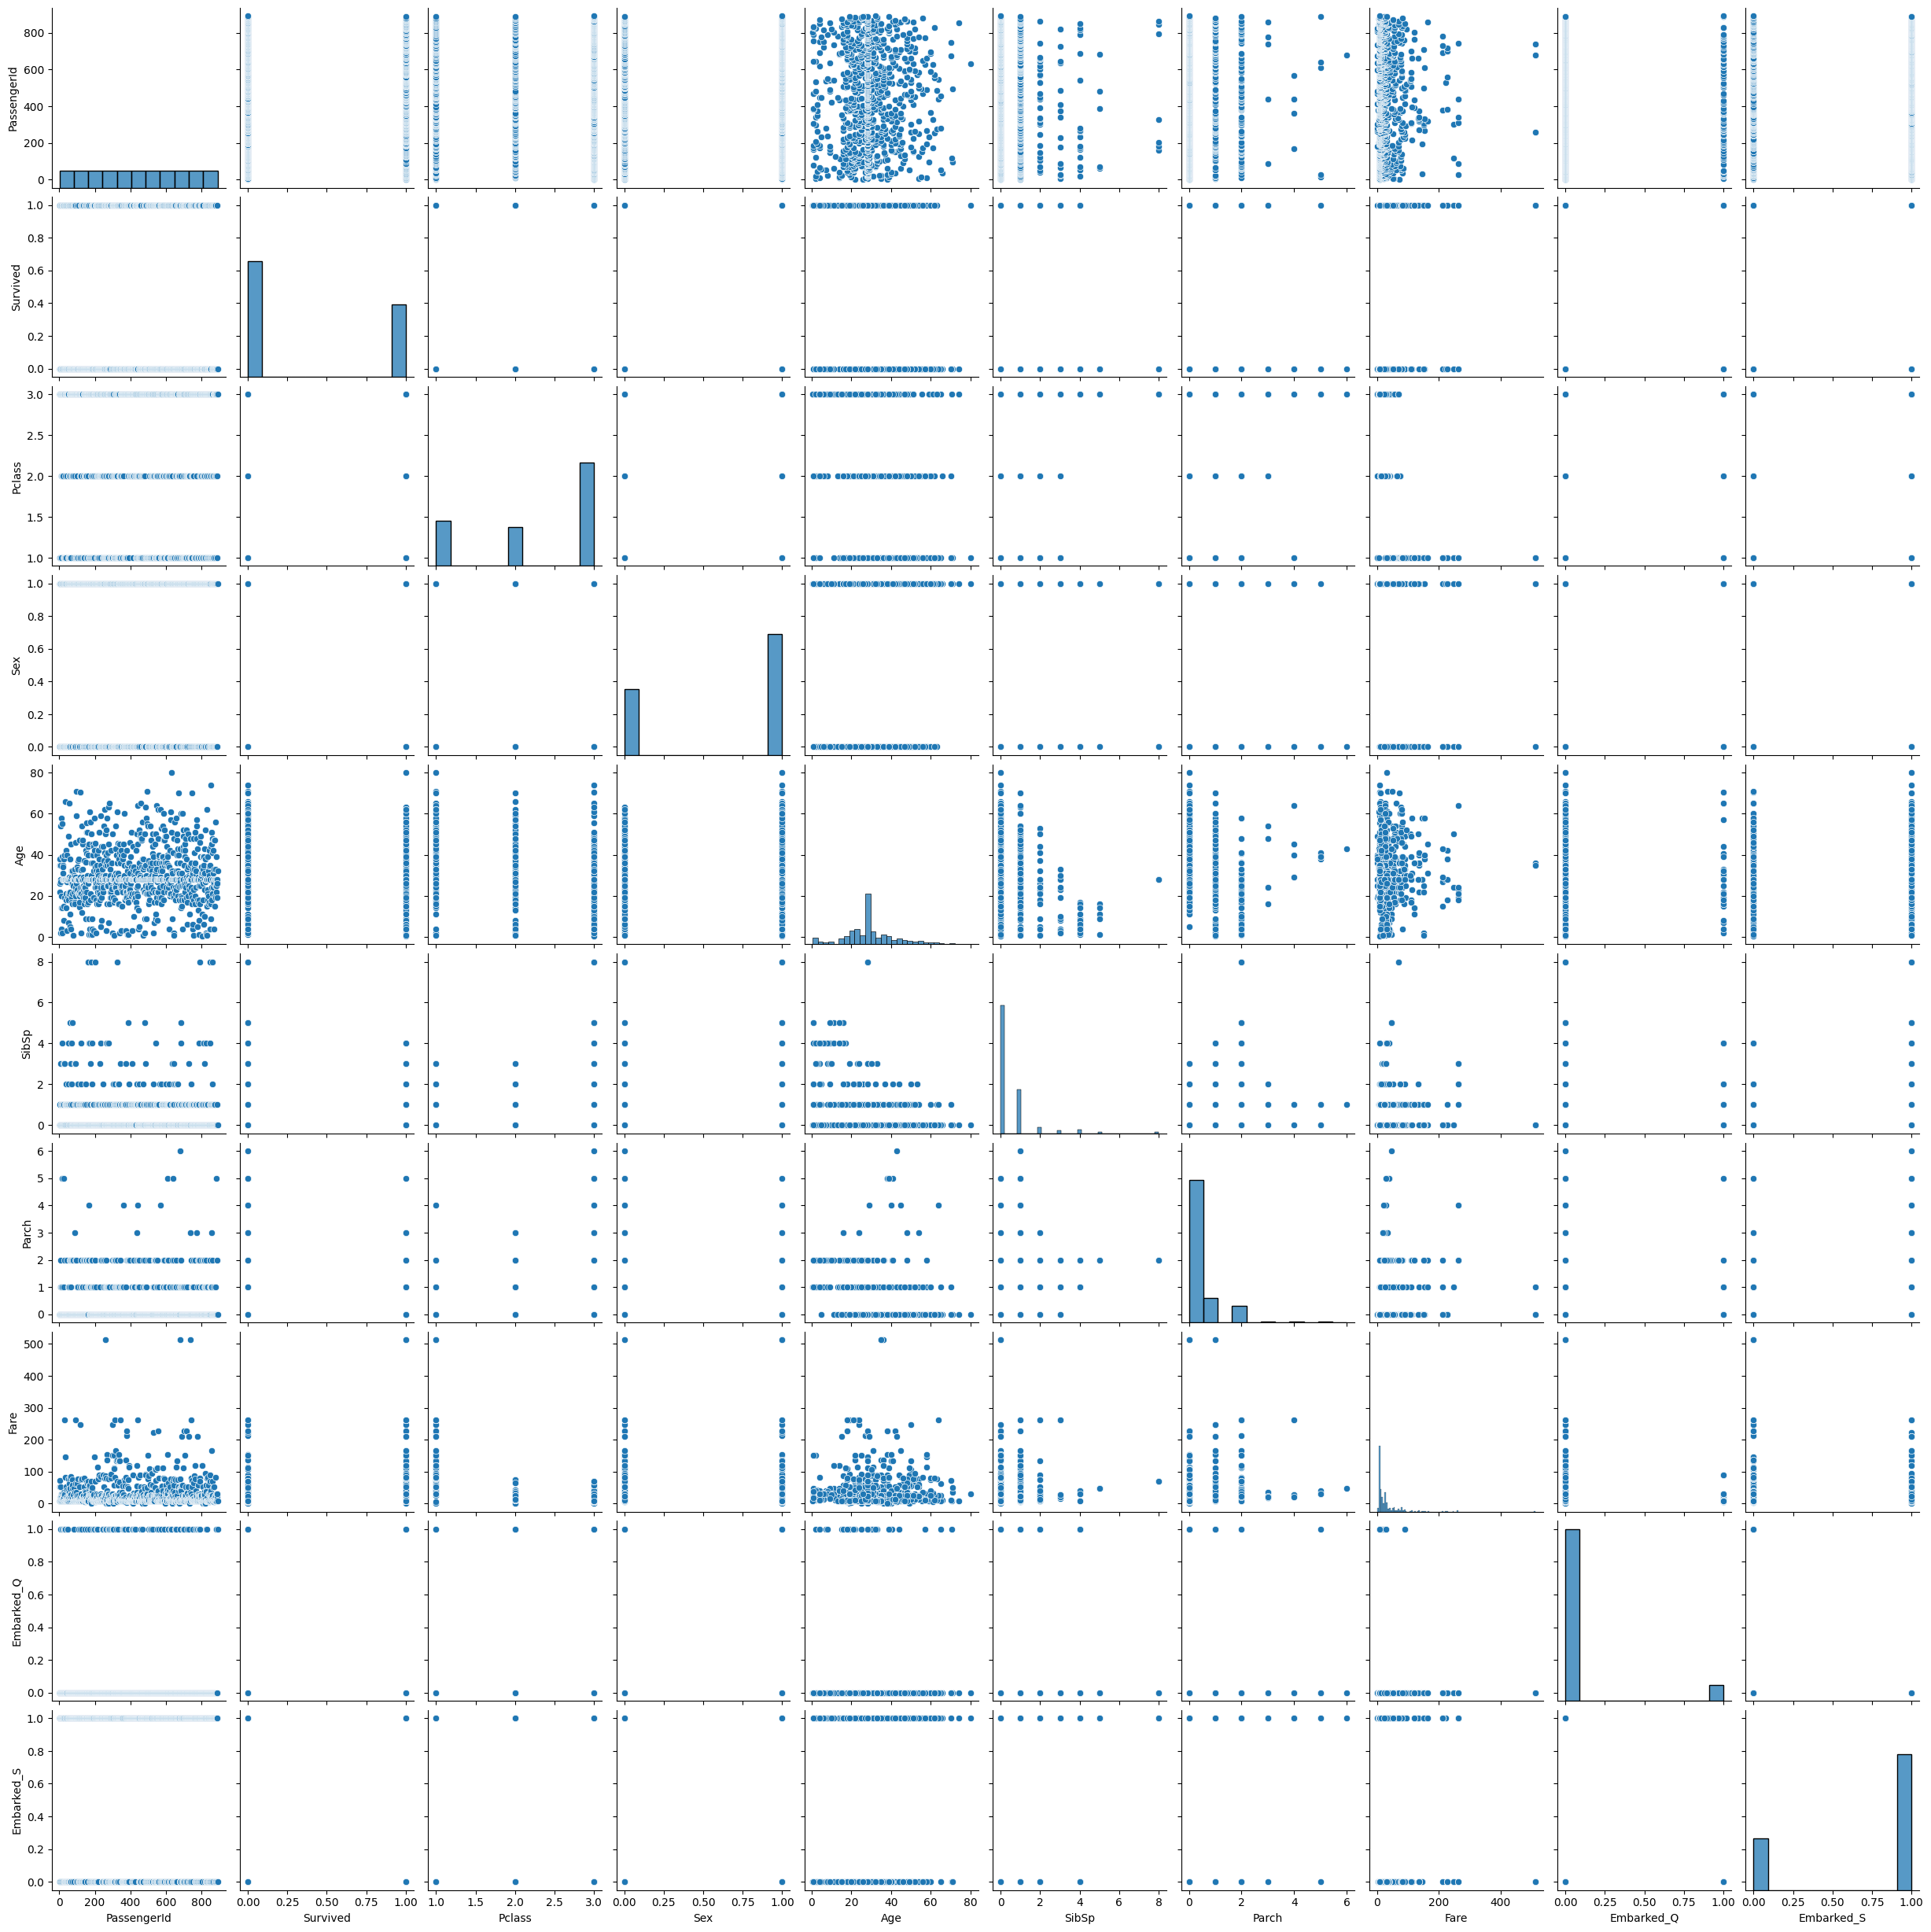

In [26]:
sns.pairplot(df)
plt.show()

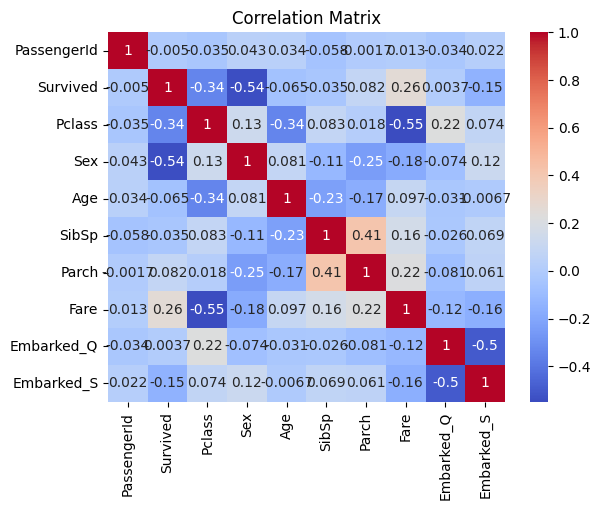

In [30]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()